In [1]:
import numpy as np
import matplotlib.pyplot as plt
from omegaconf import OmegaConf
from torch.utils.data import DataLoader
from train._utils import optimize_model, model_predict, split_train_test
from models._utils import LinearNN, NeuralCFC, NetworkLSTM
from data._utils import NeuralActivityDataset
from data._main import get_dataset

In [49]:
config = OmegaConf.load("conf/dataset.yaml")
# load a dataset (multiple worms)
dataset = get_dataset(config)
# get calcium data for one worm
single_worm_dataset = dataset["worm0"]
calcium_data = single_worm_dataset["calcium_data"]
mask = single_worm_dataset["named_neurons_mask"]
print(
    single_worm_dataset["num_neurons"],
    single_worm_dataset["num_unknown_neurons"],
    single_worm_dataset["num_named_neurons"],
)

Chosen dataset(s): ['sine']
Num. worms: 6
Worm names: ['worm0', 'worm1', 'worm2', 'worm3', 'worm4', 'worm5']


302 100 202


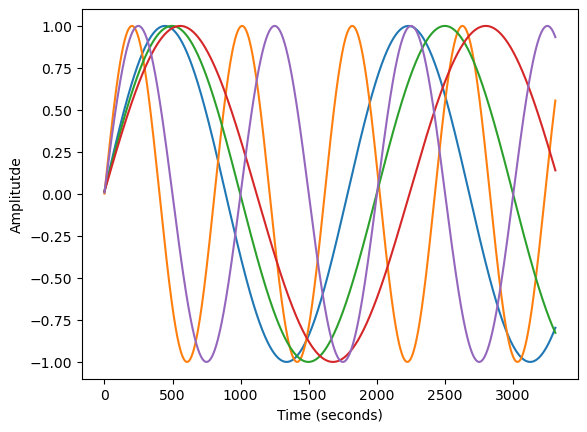

In [3]:
plt.figure()
plt.plot(single_worm_dataset["time_in_seconds"], calcium_data[:, mask][:, :5])
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitutde")
plt.show()

(302, 100, 202)

In [5]:
# create train and test data loaders with `split_train_test`
kwargs = dict(
    k_splits=2,
    seq_len=999,
    batch_size=128,
    train_size=1024,
    test_size=512,
    shuffle=False,  # if True samples in a batch are not sequential
    reverse=False,
    tau=100,  # offset of target
)
train_loader, test_loader, train_mask, test_mask = split_train_test(
    calcium_data,
    **kwargs,
)

In [6]:
for X_train, Y_train, metadata_train in train_loader:
    break
for X_test, Y_test, metadata_test in test_loader:
    break
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

torch.Size([128, 999, 302]) torch.Size([128, 999, 302])
torch.Size([128, 999, 302]) torch.Size([128, 999, 302])


In [8]:
b = 0  # batch
n = np.random.choice(302)  # neuron

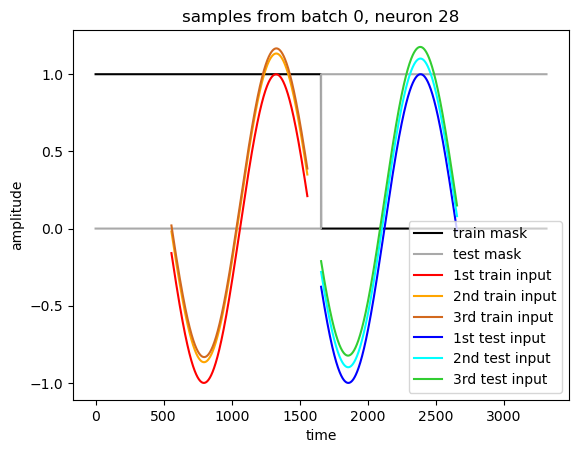

In [47]:
# multiple inputs
plt.figure()

plt.plot(train_mask.to(float).numpy(), color="black", label="train mask")  # train mask
plt.plot(test_mask.to(float).numpy(), color="darkgray", label="test mask")  # test mask

# train
plt.plot(
    metadata_train["time_vec"][b, :],
    X_train[b, :, n],
    color="red",
    label="1st train input",
)  # first sample in train batch
plt.plot(
    metadata_train["time_vec"][b, :],
    0.15 * np.random.rand() + X_train[b + 1, :, n],
    color="orange",
    label="2nd train input",
)  # second sample in train batch
plt.plot(
    metadata_train["time_vec"][b, :],
    0.2 * np.random.rand() + X_train[b + 2, :, n],
    color="chocolate",
    label="3rd train input",
)  # second sample in train batch

# test
plt.plot(
    metadata_test["time_vec"][b, :],
    X_test[b, :, n],
    color="blue",
    label="1st test input",
)  # first sample in test batch, neuron 0
plt.plot(
    metadata_test["time_vec"][b, :],
    0.15 * np.random.rand() + X_test[b + 1, :, n],
    color="cyan",
    label="2nd test input",
)  # second sample in test batch
plt.plot(
    metadata_test["time_vec"][b, :],
    0.2 * np.random.rand() + X_test[b + 2, :, n],
    color="limegreen",
    label="3rd test input",
)  # second sample in test batch

plt.xlabel("time")
plt.ylabel("amplitude")
plt.legend(loc="lower right")
plt.title("samples from batch %s, neuron %s" % (b, n))

plt.show()

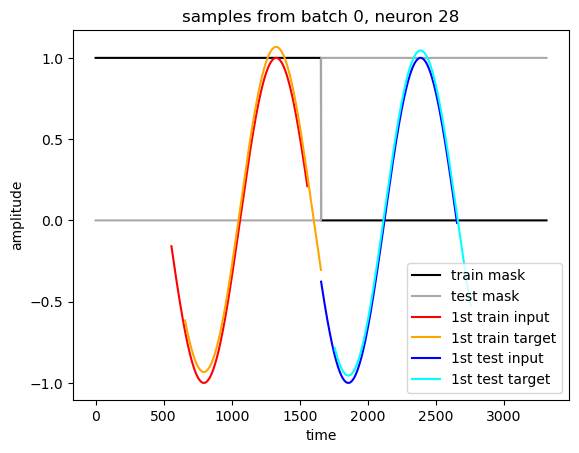

In [48]:
# inputs and targets
plt.figure()

plt.plot(train_mask.to(float).numpy(), color="black", label="train mask")  # train mask
plt.plot(test_mask.to(float).numpy(), color="darkgray", label="test mask")  # test mask

# train
plt.plot(
    metadata_train["time_vec"][b, :],
    X_train[b, :, n],
    color="red",
    label="1st train input",
)  # first sample in train batch
plt.plot(
    metadata_train["tau"][b] + metadata_train["time_vec"][b, :],
    0.2 * np.random.rand() + Y_train[b, :, n],
    color="orange",
    label="1st train target",
)  # second sample in train batch

# test
plt.plot(
    metadata_test["time_vec"][b, :],
    X_test[b, :, n],
    color="blue",
    label="1st test input",
)  # first sample in test batch
plt.plot(
    metadata_test["tau"][b] + metadata_test["time_vec"][b, :],
    0.2 * np.random.rand() + Y_test[b, :, n],
    color="cyan",
    label="1st test target",
)  # second sample in test batch

plt.xlabel("time")
plt.ylabel("amplitude")
plt.legend(loc="lower right")
plt.title("samples from batch %s, neuron %s" % (b, n))

plt.show()